# Principal Component Analysis
- 대표적인 차원 축소 기법 중 하나
- 원본 데이터의 분포를 최대한 보존하면서 고차원 공간의 데이터를 저차원 공간의 데이터로 변환
- 데이터 저장 공간이 부족할 때 군집이나 분류에 영향을 끼치지 않으면서 저장공간을 확보할 때도 활용 가능

### Practice
- Using **`!wget`**
- import `numpy` library
  - Using `.load()`
  - Using `.reshape()`
  - Using `.shape`
  - Using `.sum`
  - Using `.mean`

- import **`sklearn.decomposition`**
  - Using **`PCA()`**
- import `sklearn.linear_model`
  - Using **`LogisticRegression()`**
- import `sklearn.model_selection`
  - Using **`cross_validate()`**
- import `matplotlib.pyplot`
  - Using `.scatter()`
  - Using `.legend()`
  - Using `.show()`
  - Using `.figure()`
- import `sklearn.cluster`
  - Using **`KMeans()`**




### 1. Download a npy file to wget
- `!wget [URL] [OPTION]`
  - **`!`**: 코드 셀 앞 부분에 명시되면 리눅스 명령어로 인식
  - **`-O`**: 저장할 파일의 이름을 지정

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-11-01 12:21:39--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-11-01 12:21:40--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-11-01 12:21:40--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... c

### 2. Loading saved a npy file
- import `numpy` library
  - **`.load()`**: 저장된 파일의 이름을 파라미터로 전달해 로드
  - Using **`.reshape`**
  - Using `.shape`


In [ ]:
import numpy as np

fruits = np.load("fruits_300.npy")
fruits_2d = fruits.reshape(-1, 100*100)

#checkout
print(fruits_2d.shape)

(300, 10000)


### 3. Using Principal Component Analysis class
- import **`sklearn.decomposition`**
  - Using **`PCA`**
    - `n_components=`: 주성분의 개수를 지정

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

### 4. Check the principal data
- Using `components_`

In [ ]:
#Checkout array size
print(pca.components_.shape)

print(pca.components_)

(50, 10000)
[[ 9.24490195e-06  5.10601298e-06  8.91640398e-06 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.69701616e-05 -1.13551050e-05 -1.82152564e-05 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-3.65220470e-05 -2.08401735e-05 -2.89870117e-05 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 ...
 [-1.07629115e-05 -4.78437731e-05 -3.83726051e-05 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 9.10928669e-05 -3.03644246e-05 -1.71012244e-05 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-4.46634929e-05  1.18124584e-04  1.32485574e-04 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]]


### 5. Draw a subplots to use `matplotlib.pyplot`
- import `matplotlib`
  - Using `pyplot`
  - Using `subplots`
- Create Draw function
1. 3차원 배열을 입력받음
2. 입력받은 배열 값을 통해 가로로 10개씩 출력
3. 샘플 개수에 따라 행과 열의 개수를 계산해 figsize 지정
4. figsize는 ratio에 비례
5. 2중 반복문을 통해 행을 따라 이미지를 그리는 방식

In [ ]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
  n = len(arr)
  rows = int(np.ceil(n/10))
  colums = 10
  if rows < 2: colums = n
  fig, axs = plt.subplots(rows, colums, figsize=(colums*ratio, rows*ratio), squeeze=False)

  for i in range(rows):
    for j in range(colums):
      if i*10+j < n:
        axs[i, j].imshow(arr[i*10+j], cmap="gray_r")
      axs[i, j].axis("off")
  plt.show()

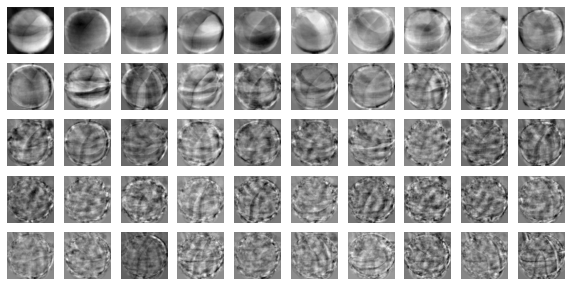

In [ ]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

### 6. Dimension reduction
- Using **`.transform()`**
  - 입력 데이터를 주성분으로 투영한 결과를 반환
  - 주성분의 데이터를 축소 가능
- Using `.shape`


In [ ]:
print(fruits_2d.shape)

#Checkout
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


### 7. Reconfigure source data
- Using **`inverse_transform()`**: 축소된 데이터를 다시 복원

In [ ]:
print(fruits_pca.shape)

#Checkout
fruits_inverse=pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 50)
(300, 10000)


### 8. Reconstruct data for restored principal components
- 복원한 데이터를 이미지로 재구성
- 차원 축소한 데이터를 복원한 것이므로 어느정도의 손실은 감안해야함
- Using `draw_fruits()` function

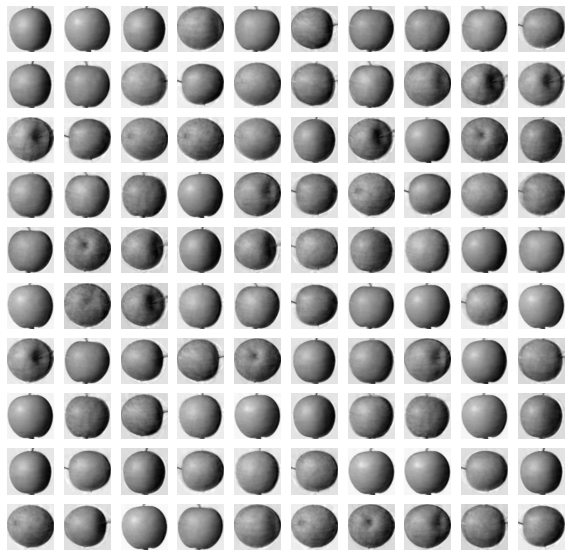

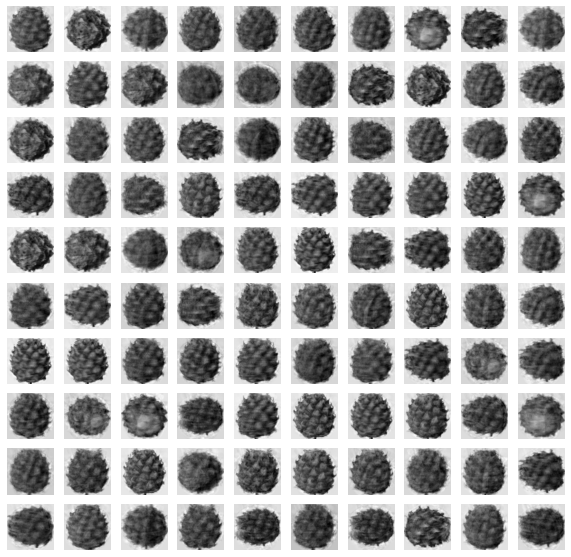

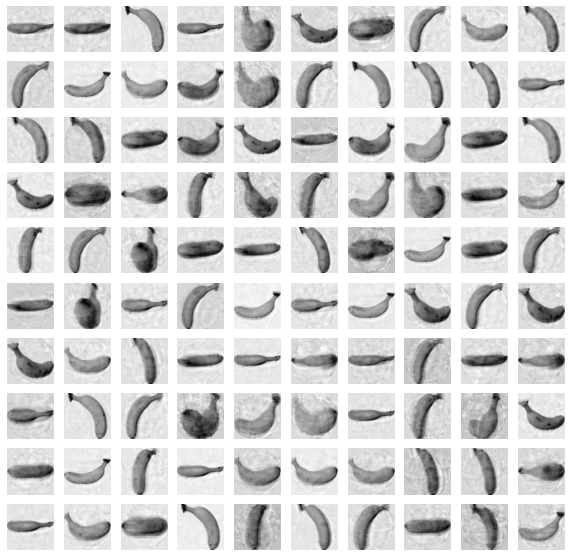

In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

> 이미지에 포함된 노이즈의 유무는 주성분의 개수와 관련이 있음을 확인 가능

### 9. Explained variance
- **설명된 분산**이란 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 수치
- Using **`explained_variance_ratio_`**
- Using `.sum()`
  - 주성분의 분산 비율을 모두 더해 주성분의 최종 분산 비율을 확인

In [ ]:
print(pca.explained_variance_ratio_)
print("\n")
#Checkout
print(np.sum(pca.explained_variance_ratio_))

[0.42357017 0.09941755 0.06577863 0.04031172 0.03416875 0.03281329
 0.02573267 0.02054963 0.01372276 0.01342773 0.01152146 0.00944596
 0.00878232 0.00846697 0.00693049 0.00645188 0.00578895 0.00511201
 0.00486382 0.00480347 0.00447837 0.00437315 0.0040804  0.00389473
 0.00372428 0.00359282 0.00331449 0.0031782  0.00304303 0.00303747
 0.00288906 0.00275801 0.00264945 0.00255843 0.00251895 0.00247187
 0.00239455 0.0023101  0.00221344 0.00216629 0.00213277 0.00195911
 0.00192343 0.00190402 0.00183842 0.00182676 0.00172872 0.00168323
 0.00163322 0.00157986]


0.9215168360233781


### 10. Visualize the an explained variance graph
- import `matplotlib.pyplot`

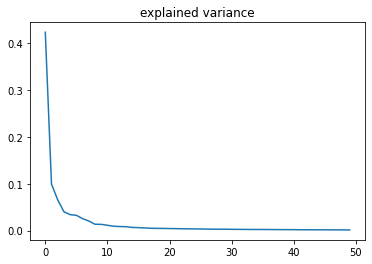

In [ ]:
import matplotlib.pyplot as plt

plt.plot(pca.explained_variance_ratio_)
plt.title("explained variance")
plt.show()

### 11. Use in a classification model
- import `sklearn.linear_model`
  - Using **`LogisticRegression()`**
- import `sklearn.model_selection`
  - Using `cross_validate()`
- Using **`PCA()`**

In [ ]:
#create model, target
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
target = np.array([0]*100 + [1]*100 +  [2]*100)

In [ ]:
#create fruits_2d scores
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores["test_score"]))
print(np.mean(scores["fit_time"]))

0.9966666666666667
1.1123340606689454


In [ ]:
#create fruits_pca scores
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores["test_score"]))
print(np.mean(scores["fit_time"]))

1.0
0.027964019775390626


In [ ]:
#explained variance 50%
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

#Checkout
print(pca.n_components_)
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

2
(300, 2)


> 이를 통해 차원이 축소된 데이터가 교차 검증 점수도 높고, 수행 시간도 짧다는 것을 확인 가능

### 12. Use in a cluster model
- import `sklearn.cluster`
  - Using **`KMeans()`**
- Using `.unique()`
- Using `draw_fruits()` function


In [ ]:
from sklearn.cluster import KMeans

#Create model
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

#Checkout
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))


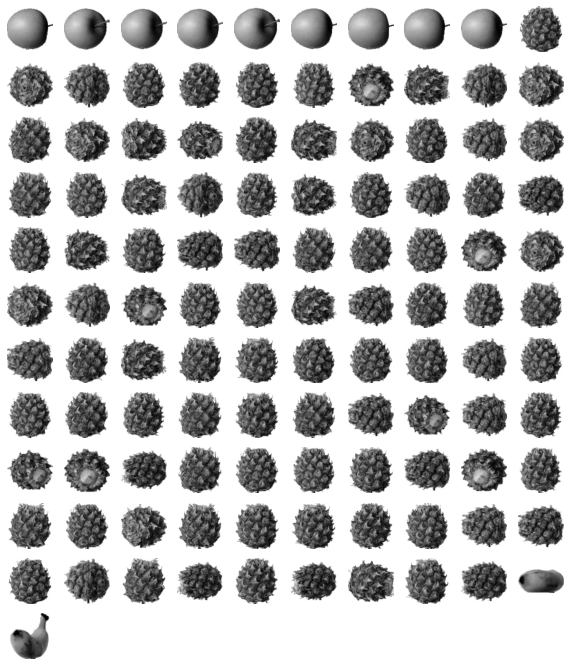

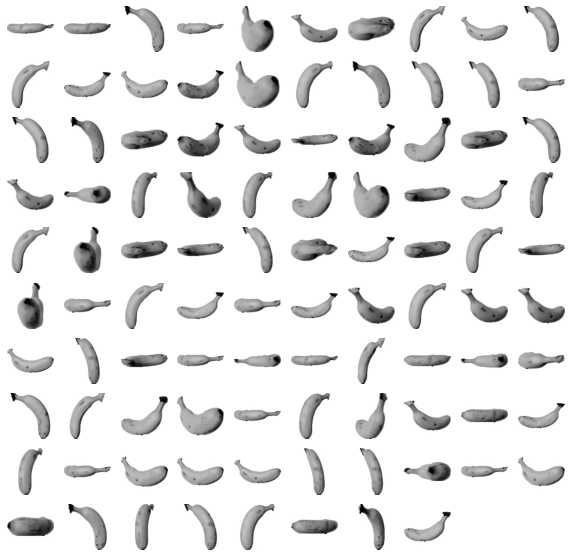

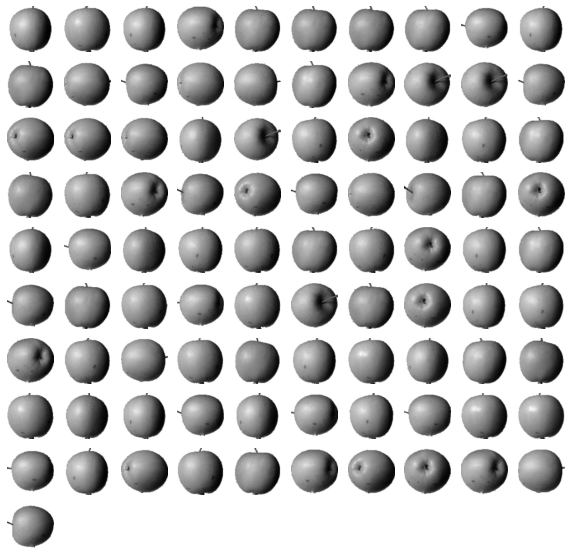

In [ ]:
#draw fruits

for label in range(0, 3):
  draw_fruits(fruits[km.labels_ == label])
  print("\n")

### 13. Data Visualization
- 데이터의 차원을 3개 이하의 차원으로 축소하면 시각화에 유리
- Using `.scatter()`
- Using `.legend()`
- Using `.figure()`
- Using `.show()`

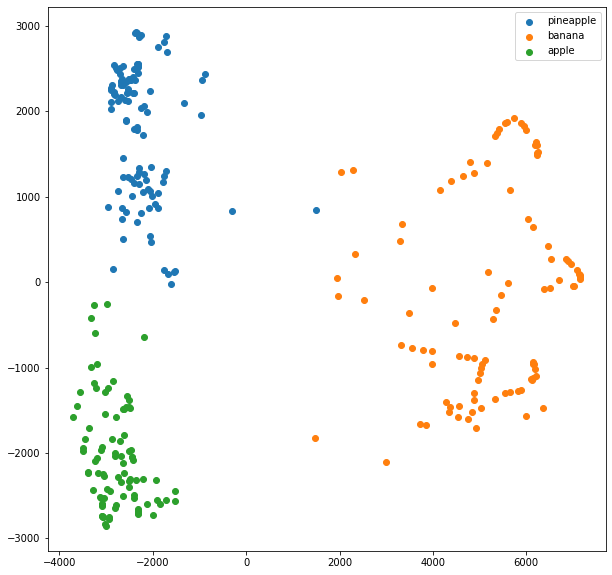

In [ ]:
plt.figure(figsize=(10, 10))
for label in range(0, 3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(["pineapple", "banana", "apple"])
plt.show()